In [46]:
#Labels and the corresponding class of the target
#descriptions = ("Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", #"Used in Last Week", "Used in Last Day")
#class_label = ('CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6')

In [47]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
    
import pandas as pd


# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)

In [48]:
# Specify the name of the columns
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Show the header and the first five rows
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [49]:
# Specify the name of the columns that should be removed
columns_remove = ['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer', 'VSA']

# Remove the columns above (in columns_remove)
df = df.drop(['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Heroin', 'Meth', 'Mushrooms', 'Semer', 'VSA','Escore', 'SS', 'Impulsive', 'Education','Age','Gender','Ethnicity'], axis=1)

In [50]:
#Check the new data frame
df.head()

,Country,Nscore,Oscore,Ascore,Cscore,Nicotine
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665,CL2
1,0.96082,-0.67825,1.43533,0.76096,-0.14277,CL4
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450,CL0
3,0.96082,-0.14882,-0.01928,0.59042,0.58489,CL2
4,0.96082,0.73545,-0.45174,-0.30172,1.30612,CL2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028364A8D3C8>],
      dtype=object)

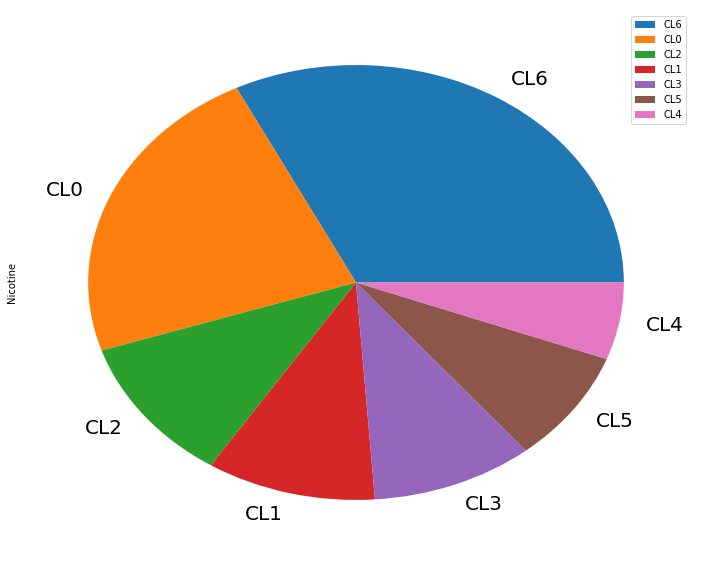

In [51]:
#Get Unique Meth User values,output to a dataframe and plot it
Nicotine_dist = df.Nicotine.unique()
Nicotine_Users = df['Nicotine'].value_counts()
Nicotine_df = pd.DataFrame(Nicotine_Users)

explode = (0, 0.05, 0, 0)
Nicotine_df.plot.pie(subplots=True,fontsize=20,figsize=(12, 10))

In [70]:
Nicotine_Users

CL6    610
CL0    428
CL2    204
CL1    193
CL3    185
CL5    157
CL4    108
Name: Nicotine, dtype: int64

In [15]:
df.Nicotine.replace(to_replace=dict(CL0='NonUser', CL1= 'NonUser', CL2= 'NonUser', CL3= 'User', CL4 = 'User', CL5= 'User', CL6= 'User' ), inplace=True)



df.head()

,Country,Nscore,Oscore,Ascore,Cscore,Nicotine
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665,NonUser
1,0.96082,-0.67825,1.43533,0.76096,-0.14277,User
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450,NonUser
3,0.96082,-0.14882,-0.01928,0.59042,0.58489,NonUser
4,0.96082,0.73545,-0.45174,-0.30172,1.30612,NonUser


In [16]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df.replace('?', np.NaN, inplace=True)

# Remove rows with np.NaN
df.dropna(how='any', inplace=True)

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 1885
Number of rows after removing rows with missing values: 1885


In [17]:
# Get the feature vector
X = df.drop("Nicotine", axis=1).values

# Get the target vector
y = df["Nicotine"].values

In [18]:
# Specify the name of the target
target = 'Nicotine'

# Get the target vector
y = df[target]
# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
X = df[features]

In [19]:
#ONE HOT ENCODING 
X = pd.get_dummies(X)

# Show the encoded features
X.head()

,Country,Nscore,Oscore,Ascore,Cscore
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665
1,0.96082,-0.67825,1.43533,0.76096,-0.14277
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450
3,0.96082,-0.14882,-0.01928,0.59042,0.58489
4,0.96082,0.73545,-0.45174,-0.30172,1.30612


In [20]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
le = LabelEncoder()

print('The unique value in y before encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

# Encode the target
# Implement me
y = le.fit_transform(y)
print('The unique value in y after encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

The unique value in y before encoding: NonUser, User
The unique value in y after encoding: 0, 1


In [21]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
# Implement me
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

In [23]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)
    
print(importances)

print(accuracies)

[0.11847619 0.2254274  0.21949541 0.20918385 0.22741715]
[0.6996466431095406, 0.5918727915194346, 0.6024734982332155]


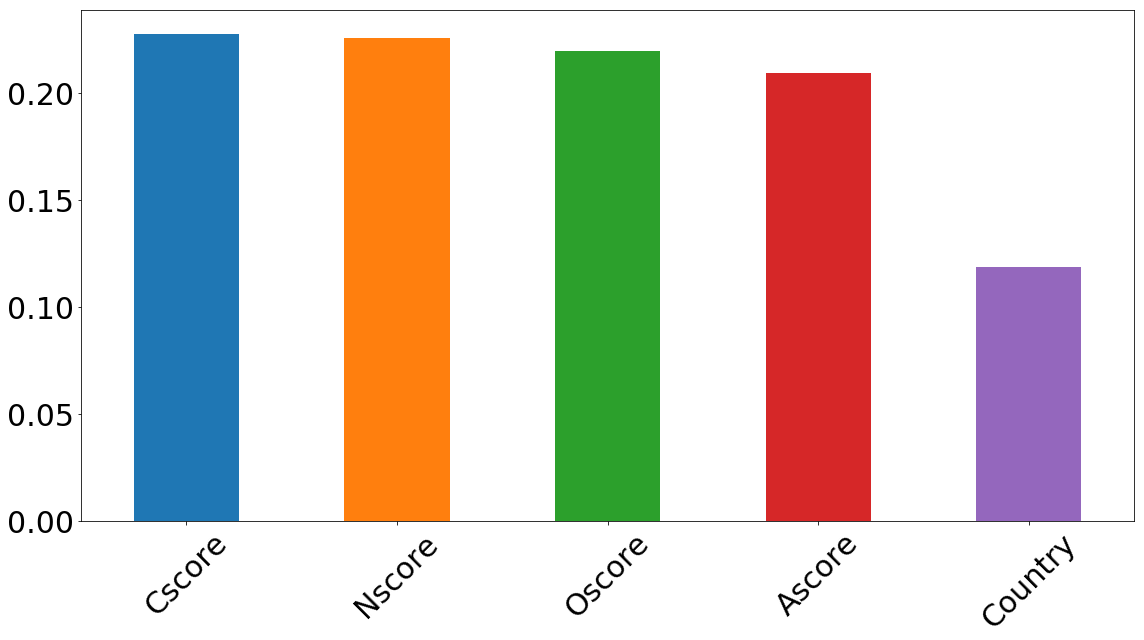

In [25]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Train the model
# Implement me
rf.fit(X_train, y_train)


# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.627208480565371


In [31]:
from sklearn.linear_model import LogisticRegression

# Delcare the model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model
# Implement me 
lr.fit(X_train, y_train)

# Print the classification accuracy
print('The accuracy of logistic regression is: ' + str(lr.score(X_test, y_test)))

The accuracy of logistic regression is: 0.6713780918727915


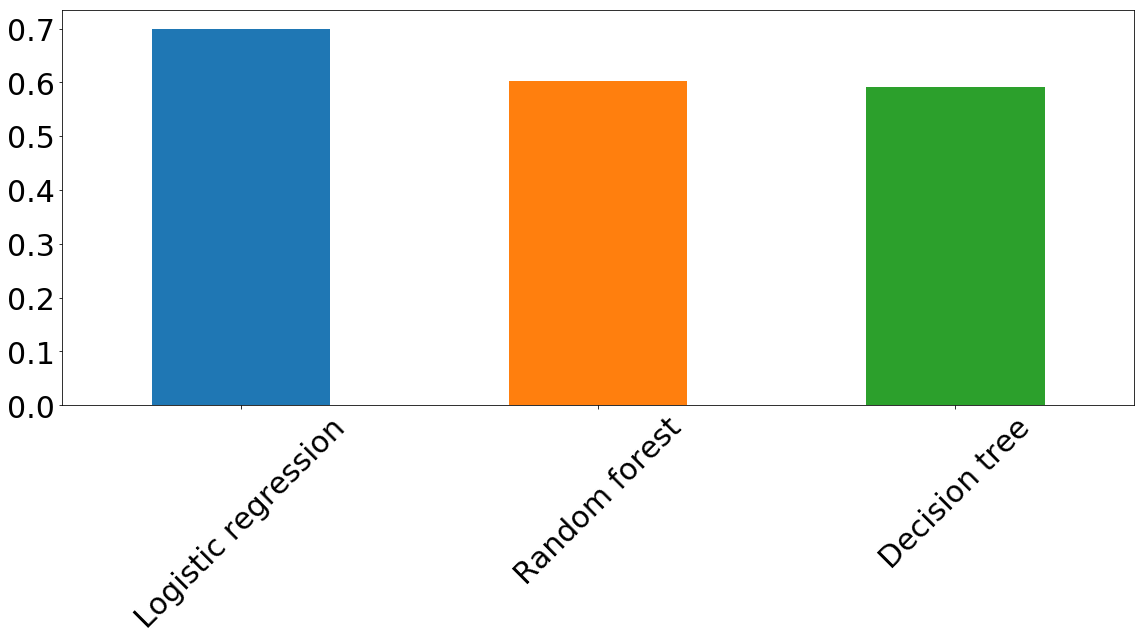

In [32]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

# Delcare the model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model
# Implement me
lr.fit(X_train, y_train)

# Print the classification accuracy
print('The accuracy of logistic regression is: ' + str(lr.score(X_test, y_test)))

The accuracy of logistic regression is: 0.6713780918727915


In [34]:
def get_distribution(clf, X, y, feature, class_):
    """
    Calculate the probability distribution of a class based on a feature
    :param clf: the logistic regression classifier
    :param X: the feature vector
    :param y: the target vector
    :param feature: a feature
    :param class_: a class label of the target
    :return: the probability distribution, which is a dictionary 
             where the key is the value of the feature and value the probability:
             distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
             
    """
    
    # Get the column number of the feature
    col = features.index(feature)
    
    # Get the encoded number of the class_
    num = le.transform([class_])
    
    # Get X_sparse
    # Here, all the columns are zeros except for column col, where X_sparse[:, col] = X[:, col]
    X_sparse = np.zeros((X.shape[0], X.shape[1]))
    X_sparse[:, col] = X[:, col]
    
    # Get the unique value and the corresponding index in column col
    vals, idxs = np.unique(X_sparse[:, col], return_index=True)
    
    # Get the distribution
    distribution = {}
    # For each unique index
    for idx in idxs:
        # Get the corresponding value
        val = X_sparse[idx, col]
        
        # Get the probability of each class
        probas = clf.predict_proba(X_sparse[idx, :].reshape(1, -1)).ravel()

        # Get the probability of the class
        proba = probas[num]
        
        distribution[val] = proba
        
    return distribution

def plot_distribution(distribution, feature, class_):
    """
    Plot the probability distribution of a class based on the feature
    :param distribution: the probability distribution, which is a dictionary 
                         where the key is the value of the feature and value the probability:
                         distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
    :param feature: a feature
    :param class_: a class label of the target
    """
    
    # Get the probabilities
    probas = [distribution[val] for val in sorted(distribution.keys())]
    
    # Get the dataframe
    probas_df = pd.DataFrame(probas)
    
    # Get the values
    vals = sorted(distribution.keys())
    
    # Round down to 2 decimals
    vals = [round(val, 2) for val in vals]

    # Plot the bar chart
    probas_df.plot(kind='bar', figsize=(25, 10), fontsize=30, color='purple', legend=False)
    plt.xticks(range(len(vals)), vals)
    plt.xlabel('Feature value', fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.title('P(' + class_ + ' | ' + feature + ')', fontsize=30, loc='center')
    plt.tight_layout()
    plt.show()

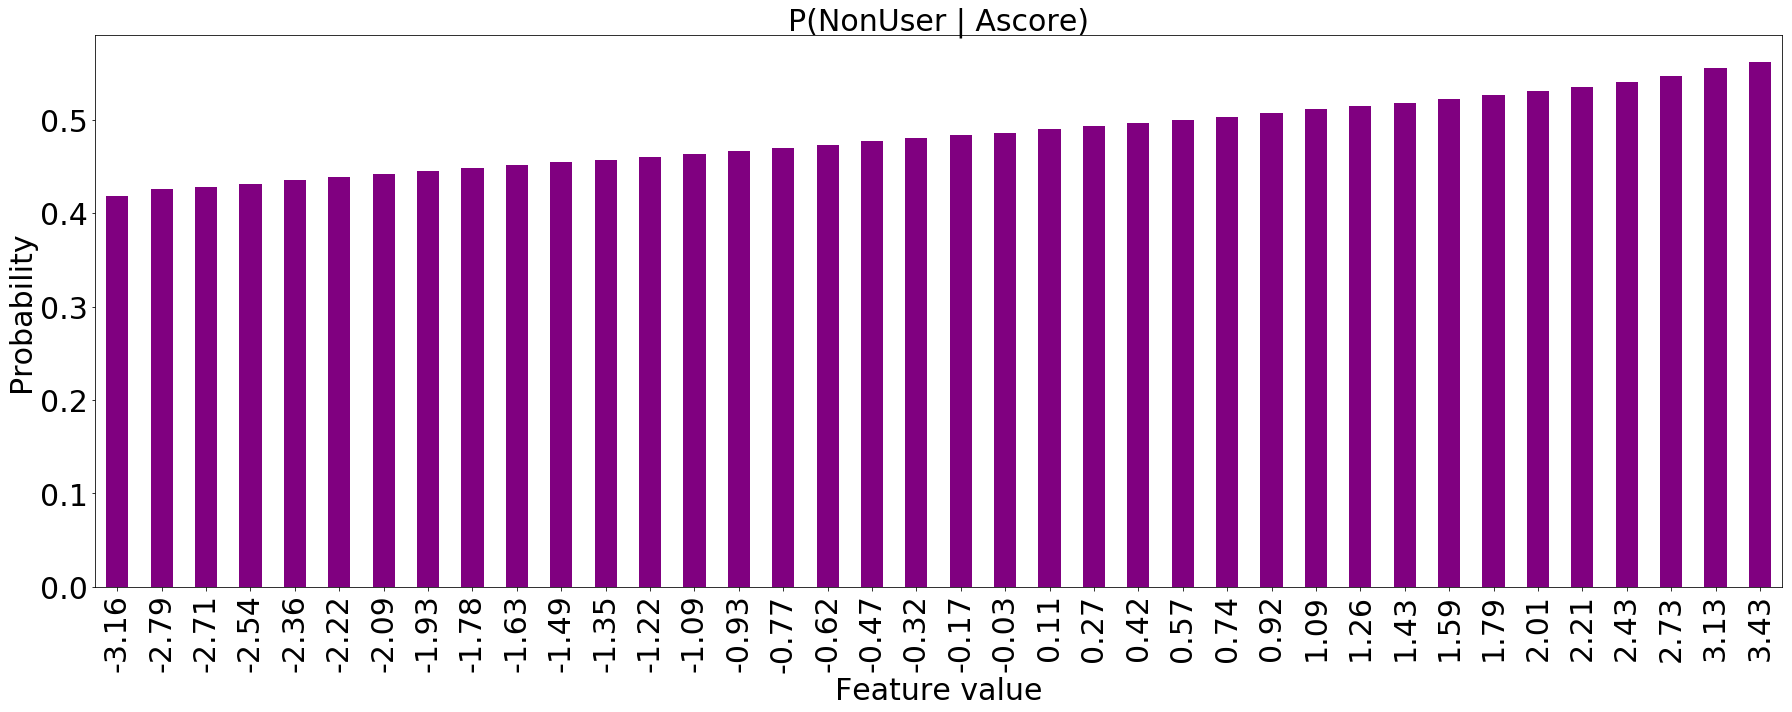

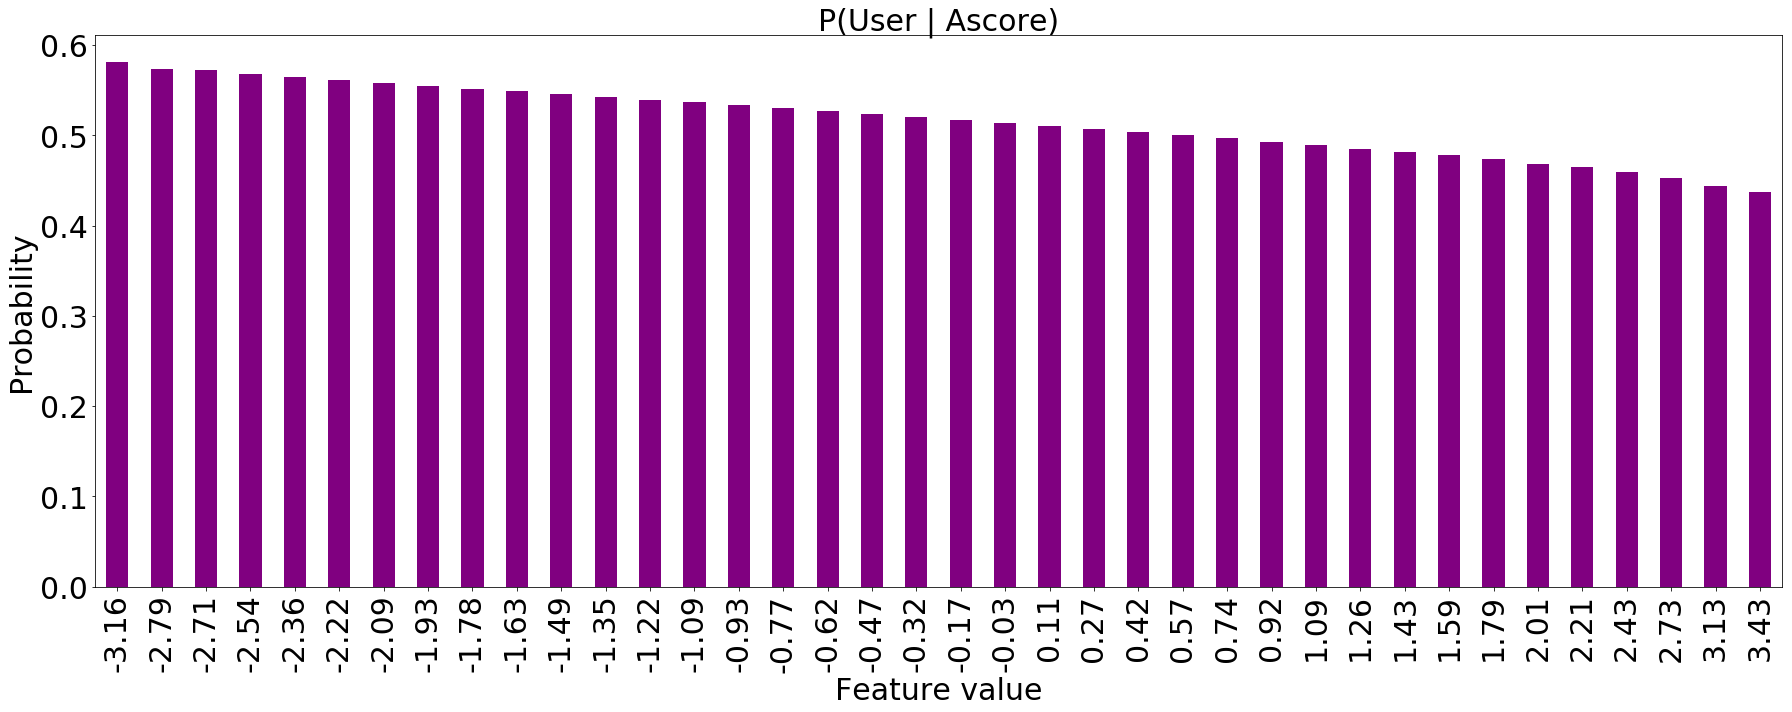

In [35]:
# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'NonUser') 

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'User')

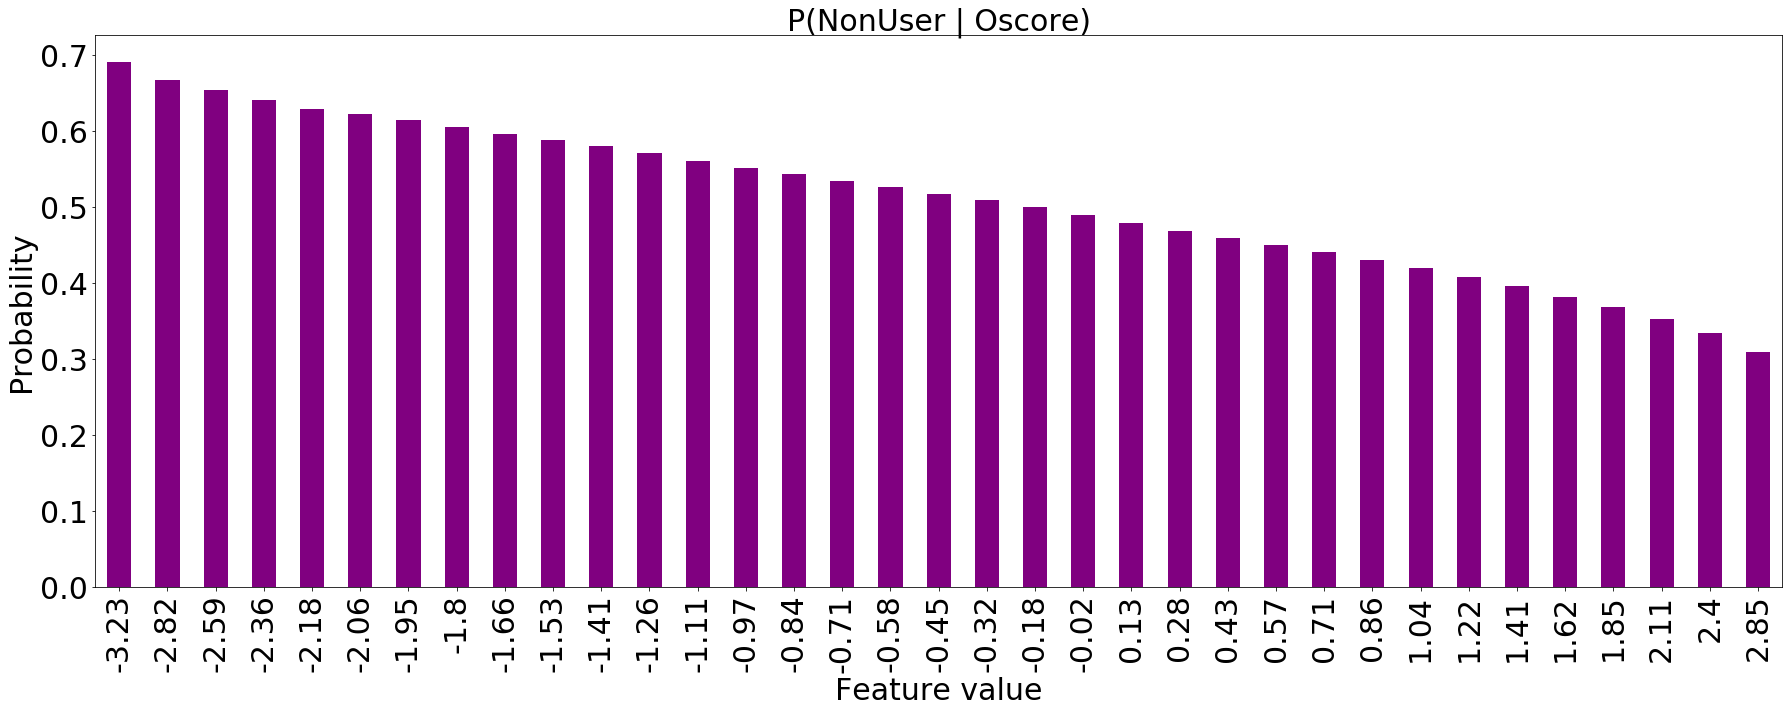

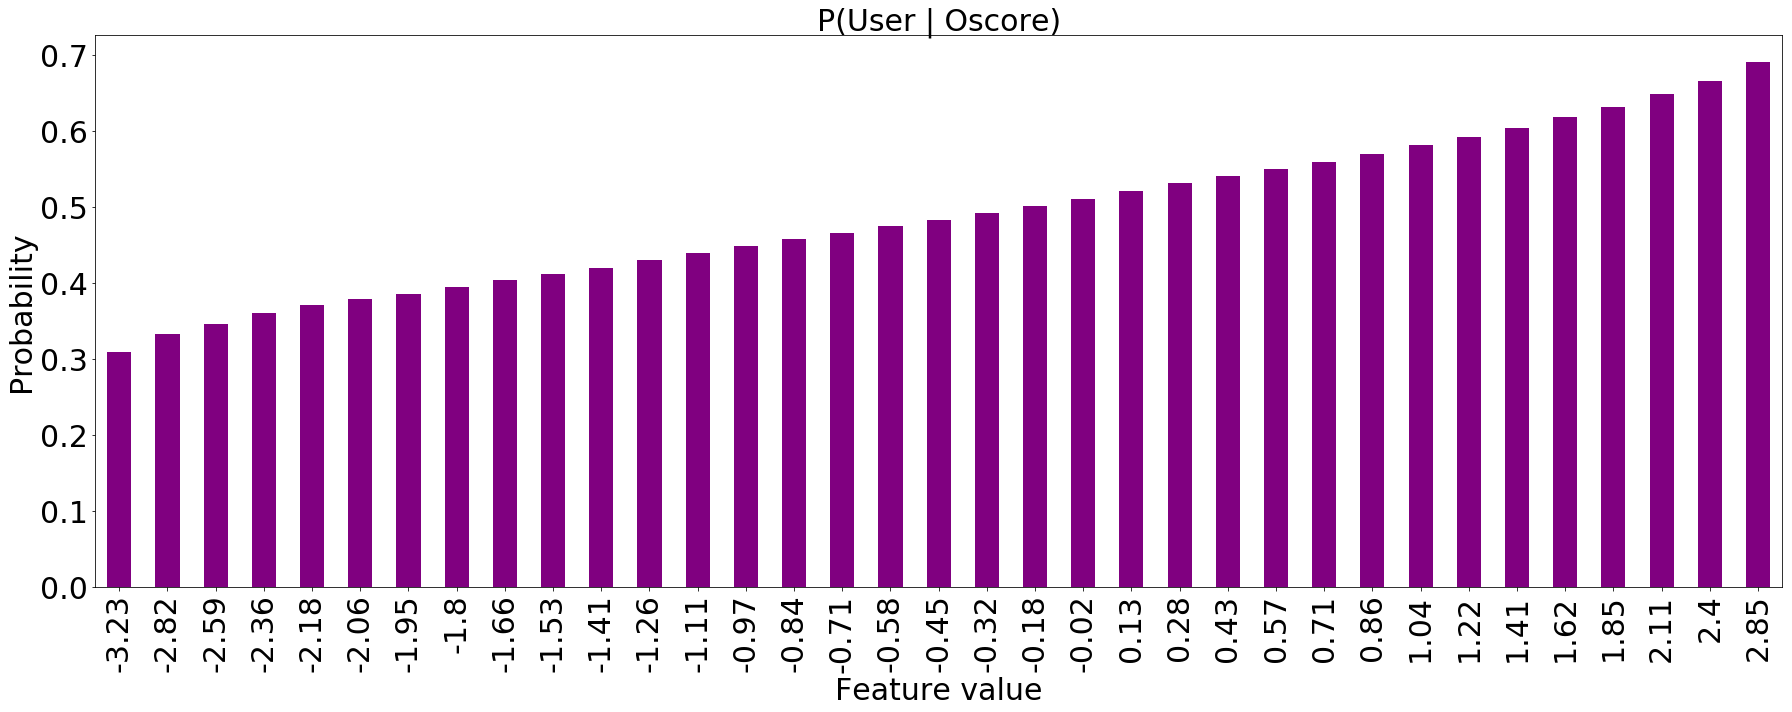

In [36]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'User')

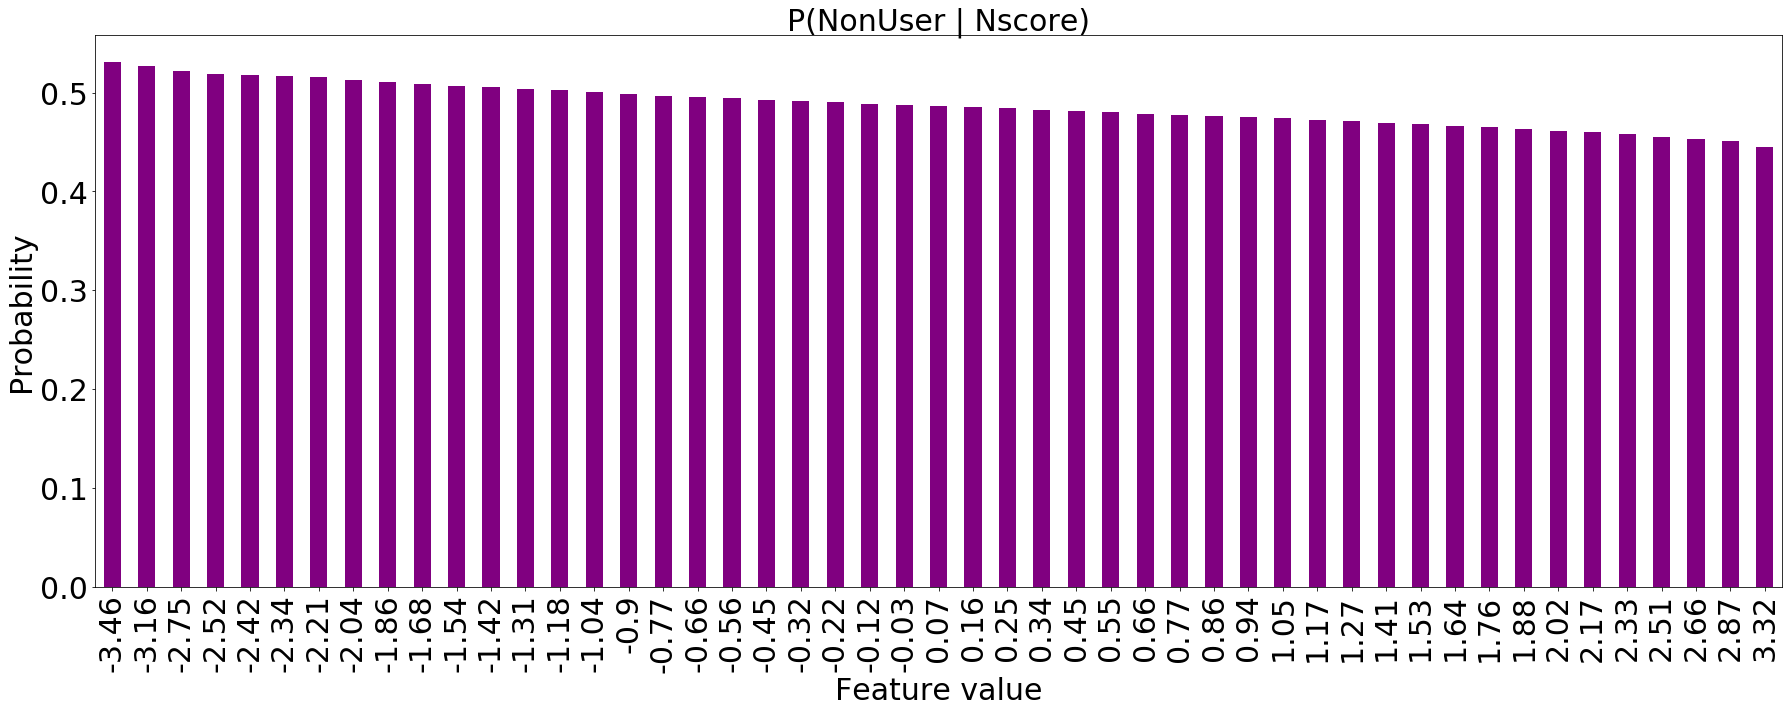

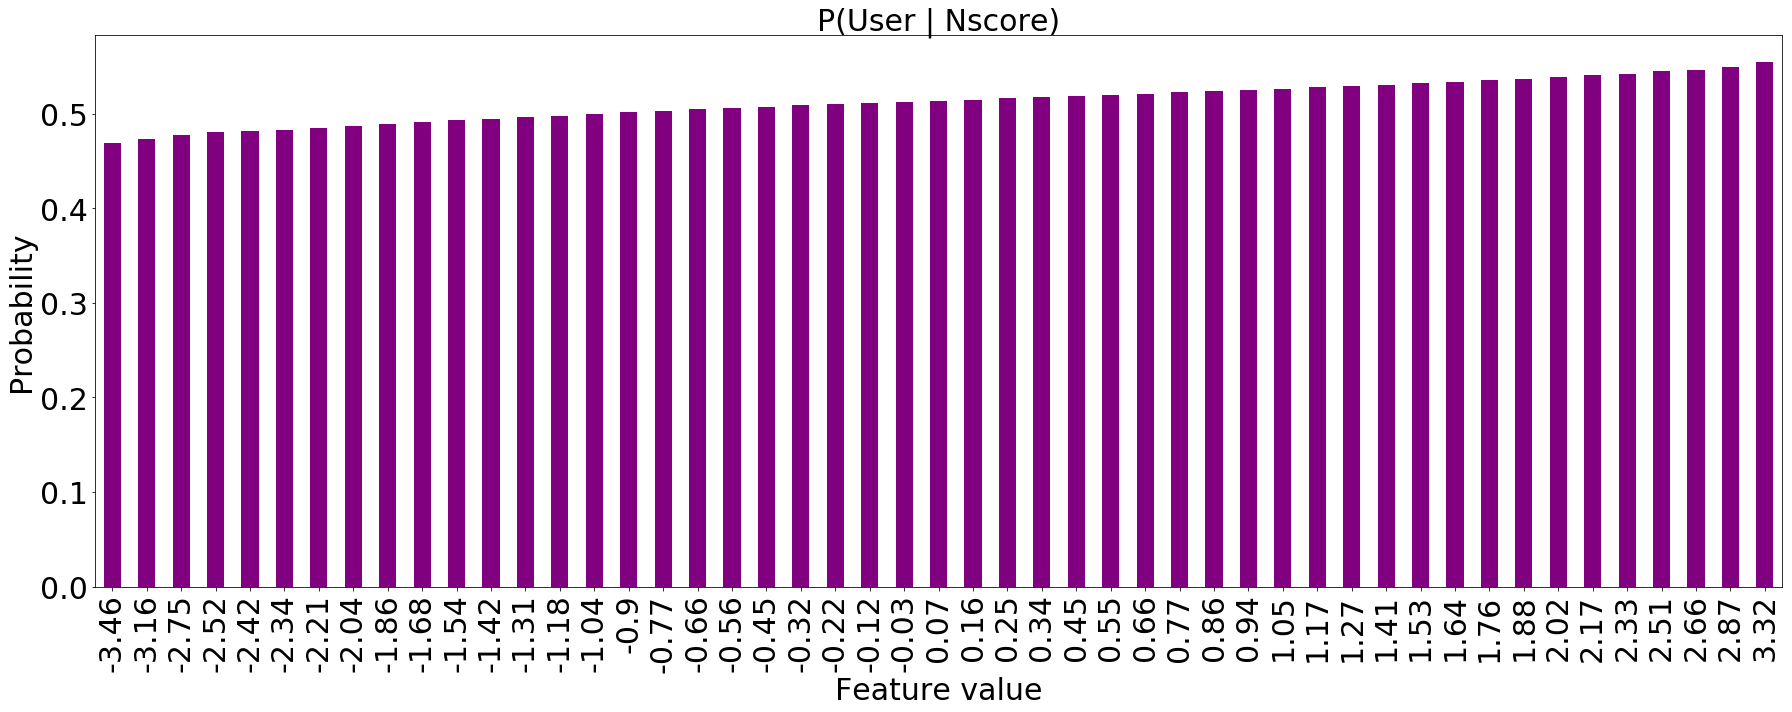

In [37]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'User')

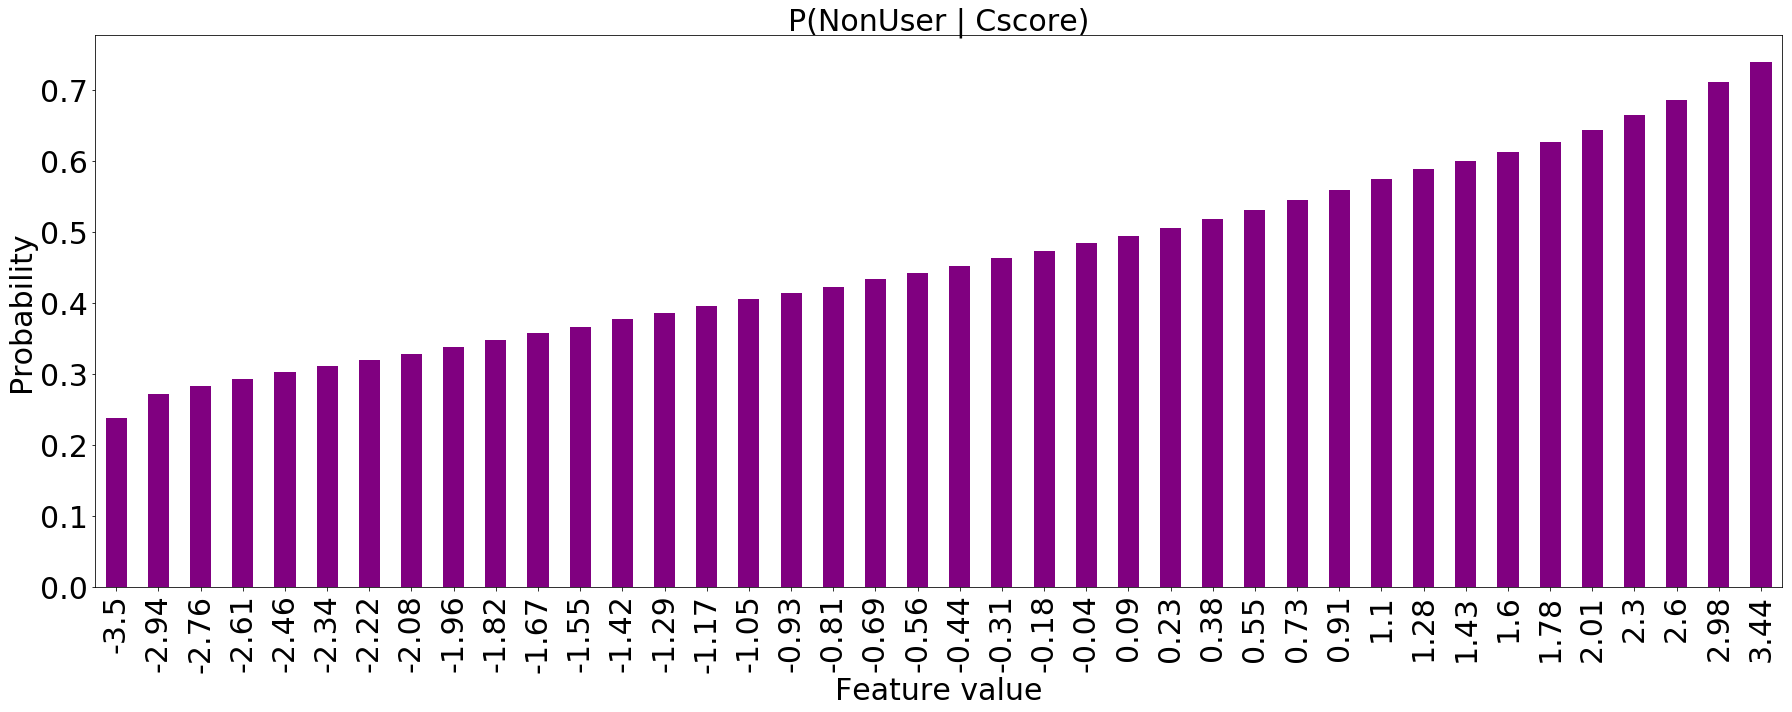

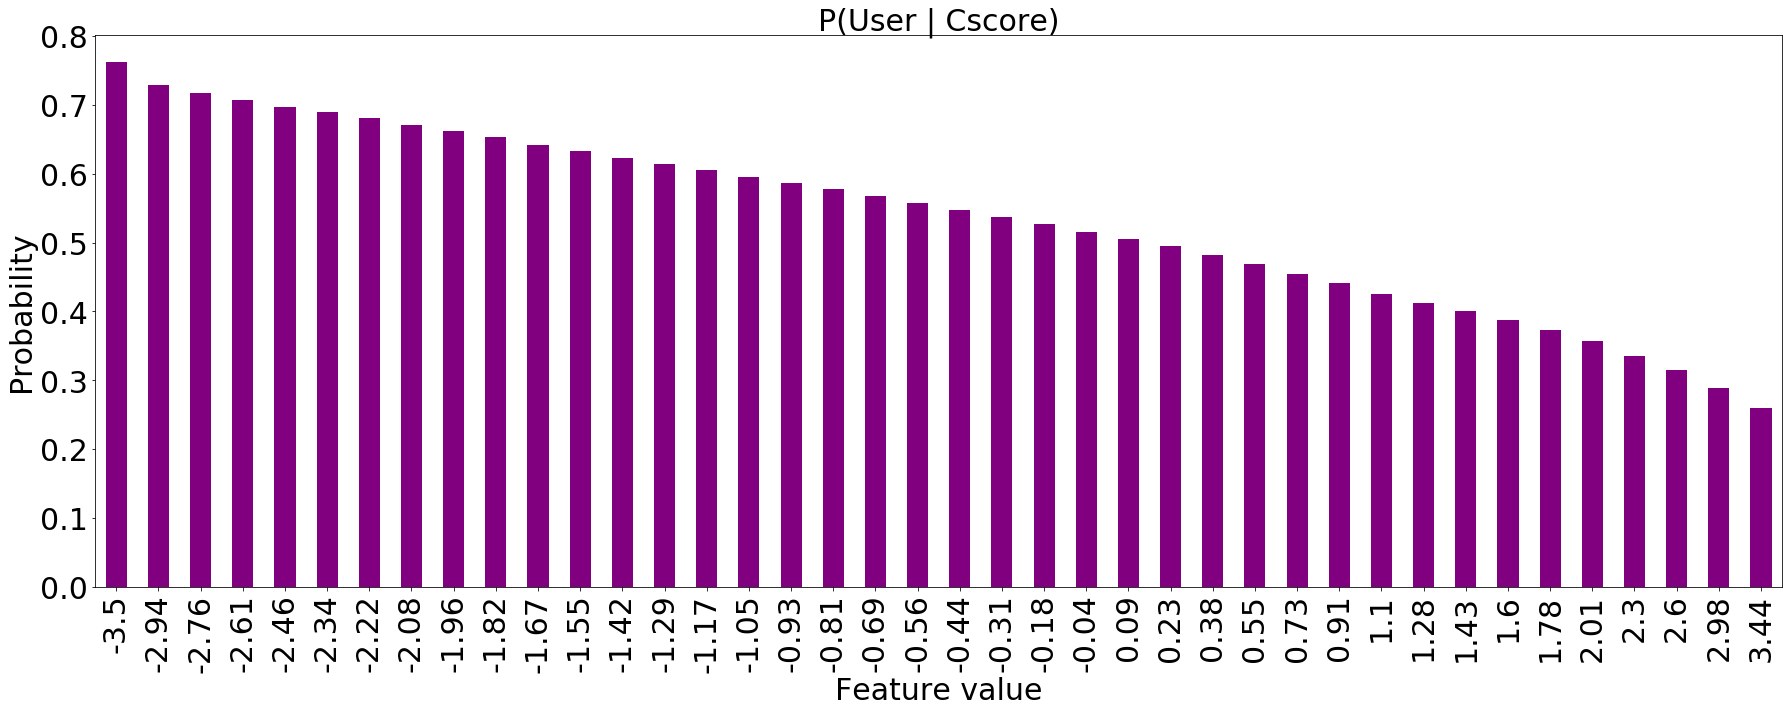

In [38]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'NonUser')

# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'User')

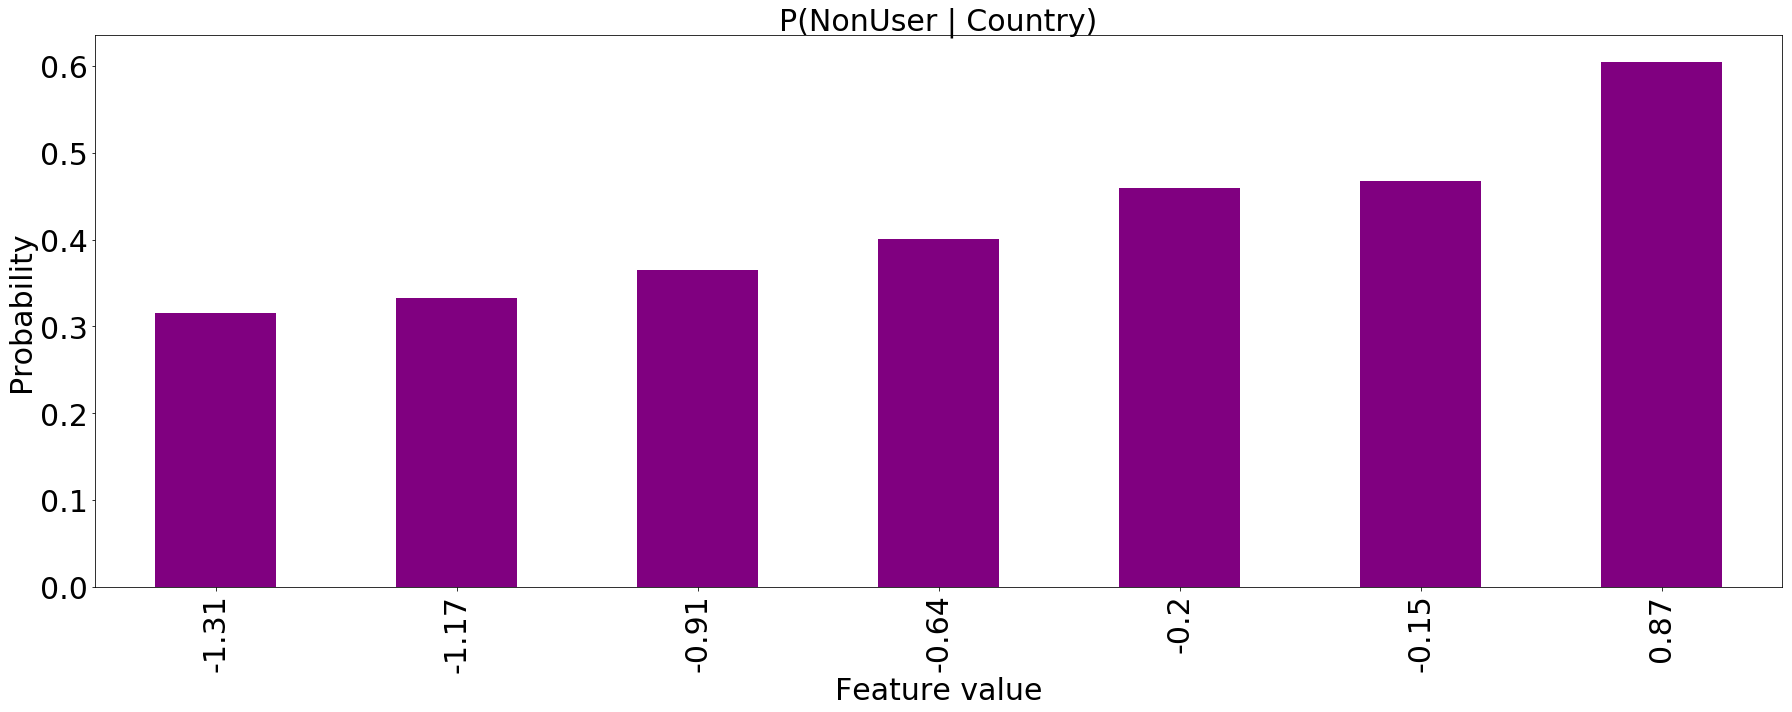

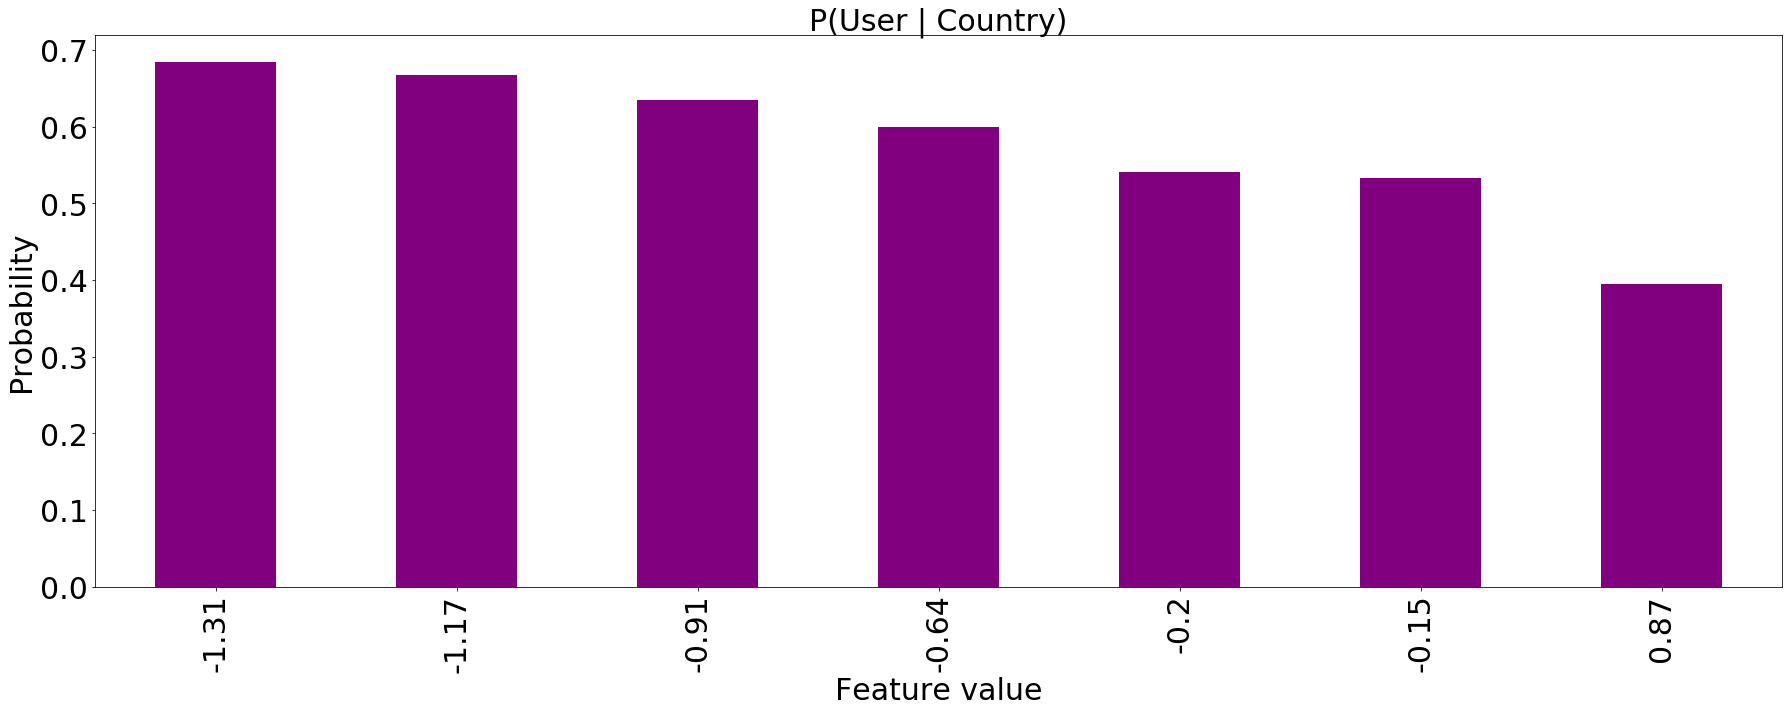

In [39]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Country', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Country', 'NonUser')

# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Country', 'User')

# Plot the distribution
plot_distribution(distribution, 'Country', 'User')

In [40]:
#Declaring the model and predicting class labels
from sklearn import cross_validation
modelRandom = RandomForestClassifier(max_depth=3)
modelRandomCV= cross_validation.cross_val_score(modelRandom,X,y,cv=5)

C:\Users\jhoff\Anaconda3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
modelRandomCV
rf_df = pd.DataFrame(modelRandomCV)

In [42]:
modelRandomCV.mean()

0.6774535809018568

In [64]:
modelRandom.fit(X,y)
Test_df = pd.DataFrame(X_test)
Test_df.columns = ['Country', 'Nscore', 'Oscore', 'Ascore', 'Cscore',]
Test_df['NicotineActual'] = pd.DataFrame(y_test)
Test_df['NicotinePredicted']=pd.DataFrame(modelRandom.predict(X_test))

Test_df.head(50)




,Country,Nscore,Oscore,Ascore,Cscore,NicotineActual,NicotinePredicted
0,-1.314886,0.162676,1.407060,0.269455,1.600119,1,1
1,-0.145780,-1.424131,0.706608,-0.317255,-1.551965,0,1
2,-1.314886,1.879147,0.706608,-0.774283,-1.047617,1,1
3,-1.314886,0.068493,-0.023897,-1.353411,-0.175110,1,1
4,-0.199932,-0.902261,-0.317523,-0.620398,0.726762,1,1
5,-1.314886,0.162676,-1.105754,0.419420,-1.171106,1,1
6,0.869603,0.445366,0.283679,-0.620398,0.091207,0,1
7,0.869603,-0.026657,-0.023897,-0.620398,-0.438385,0,1
8,-1.314886,0.857348,0.568895,0.740307,-1.171106,1,1
9,-1.314886,1.054368,0.863800,-2.904623,-0.814459,1,1


In [67]:
Test_df['NicotineActual']= Test_df['NicotineActual'].astype(str)
Test_df['NicotinePredicted']= Test_df['NicotinePredicted'].astype(str)

Test_df.NicotineActual.replace({"0" : "Nonuser", "1" : "User" })
Test_df.NicotinePredicted.replace({"0" : "Nonuser", "1" : "User" })
Test_df

,Country,Nscore,Oscore,Ascore,Cscore,NicotineActual,NicotinePredicted
0,-1.314886,0.162676,1.407060,0.269455,1.600119,1,1
1,-0.145780,-1.424131,0.706608,-0.317255,-1.551965,0,1
2,-1.314886,1.879147,0.706608,-0.774283,-1.047617,1,1
3,-1.314886,0.068493,-0.023897,-1.353411,-0.175110,1,1
4,-0.199932,-0.902261,-0.317523,-0.620398,0.726762,1,1
5,-1.314886,0.162676,-1.105754,0.419420,-1.171106,1,1
6,0.869603,0.445366,0.283679,-0.620398,0.091207,0,1
7,0.869603,-0.026657,-0.023897,-0.620398,-0.438385,0,1
8,-1.314886,0.857348,0.568895,0.740307,-1.171106,1,1
9,-1.314886,1.054368,0.863800,-2.904623,-0.814459,1,1


In [68]:
Test_df.to_csv('nicotine1.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002836456EEF0>],
      dtype=object)

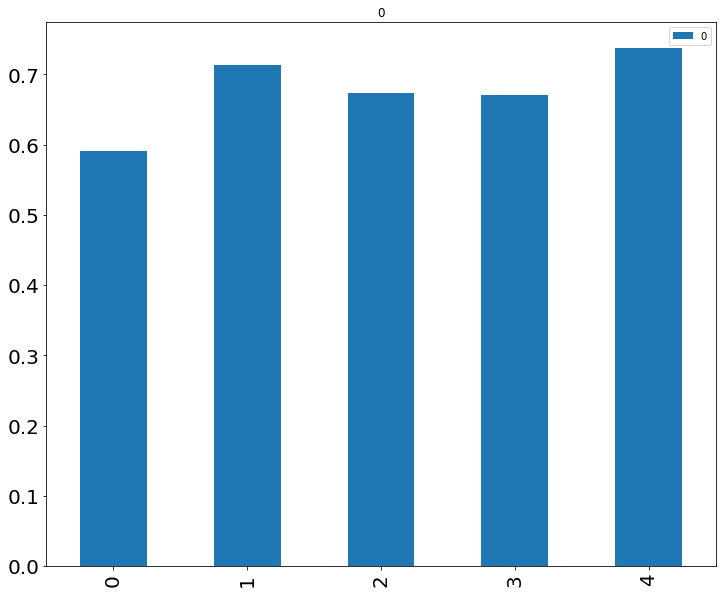

In [69]:
rf_df.plot.bar(subplots=True,fontsize=20,figsize=(12, 10))